In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import linregress

In [2]:
GDP_csv = pd.read_csv("GDP.clean")
GDP_df = pd.DataFrame(GDP_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [3]:
del GDP_df['Unnamed: 0']
GDP_df.head()

,County,GDP
0,"Autauga, AL",1539406.0
1,"Baldwin, AL",6436107.0
2,"Barbour, AL",743779.0
3,"Bibb, AL",322307.0
4,"Blount, AL",819608.0


In [4]:
del home_ownership_df['Unnamed: 0']
home_ownership_df.head()

,HOR,County
0,73.3,"Autauga, AL"
1,72.9,"Baldwin, AL"
2,62.5,"Barbour, AL"
3,75.4,"Bibb, AL"
4,78.5,"Blount, AL"


In [5]:
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [6]:
GDP_df = GDP_df.rename(columns={"County": "county"})

In [7]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,HOR,county
0,75.3,"Dade, GA"
1,66.9,"San Patricio, TX"
2,81.9,"Allegan, MI"
3,73.1,"White, GA"
4,77.0,"Dubois, IN"


In [8]:
GDP_analysis = sample_home_ownership.merge(GDP_df, on="county")
GDP_analysis.head()

,HOR,county,GDP
0,75.3,"Dade, GA",280038.0
1,66.9,"San Patricio, TX",2363122.0
2,81.9,"Allegan, MI",4096959.0
3,73.1,"White, GA",496204.0
4,77.0,"Dubois, IN",2464884.0


In [9]:
len(GDP_analysis)

622

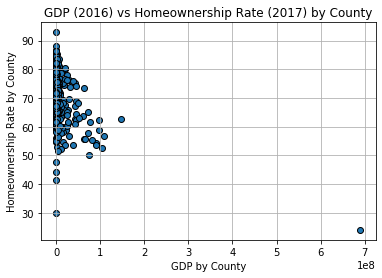

In [10]:
plt.scatter(GDP_analysis["GDP"], GDP_analysis["HOR"], marker="o", edgecolor='black')
plt.title("GDP (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("GDP by County")
plt.grid(True)
plt.savefig('Pictures/GDP_scatter.png')

In [12]:
x = GDP_analysis["GDP"]
y = GDP_analysis["HOR"]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HOR   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.09e-22
Time:                        19:53:29   Log-Likelihood:                -2119.4
No. Observations:                 622   AIC:                             4243.
Df Residuals:                     620   BIC:                             4252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.4393      0.300    241.707      0.000      71.851      73.028
GDP        -9.512e-08   9.33e-09    -10.200      0.000   -1.13e-07   -7.68e-08
==============================================================================
Omnibus:                       85.701   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.177
Skew:                          -0.790   Prob(JB):                     1.51e-38
Kurtosis:                       5.055   Cond. No.                     3.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

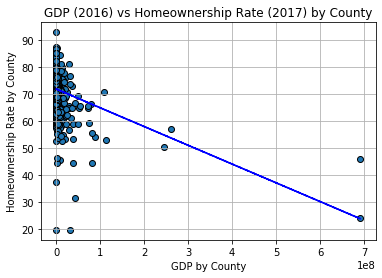

In [16]:
plt.scatter(GDP_analysis["GDP"], GDP_analysis["HOR"], marker="o", edgecolor='black')
plt.title("GDP (2016) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("GDP by County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/GDP_regression.png')